In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
data_train=pd.read_csv("/content/drive/MyDrive/softarex/income-prediction/train.csv")
data_test=pd.read_csv("/content/drive/MyDrive/softarex/income-prediction/test.csv")
sample_submission=pd.read_csv("/content/drive/MyDrive/softarex/income-prediction/sampleSubmission.csv")
data_train

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,06/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,3.0,0,0,0,0,0,0,0,0,5787594.0
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754.0
134,134,07/08/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2544857.0
135,135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,7217634.0


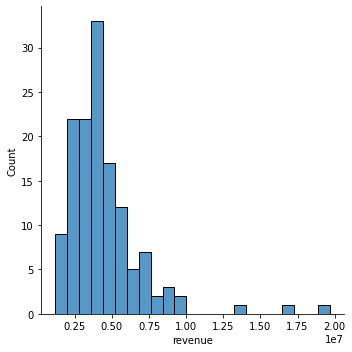

In [4]:
sns.displot(x='revenue',
            data=data_train);

На графике видно что прибыль не равномерно распределена и есть случайные выбросы

# выкинем выброс прибыли для более точных результатов


,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,06/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,3.0,0,0,0,0,0,0,0,0,5787594.0
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754.0
134,134,07/08/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2544857.0
135,135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,7217634.0


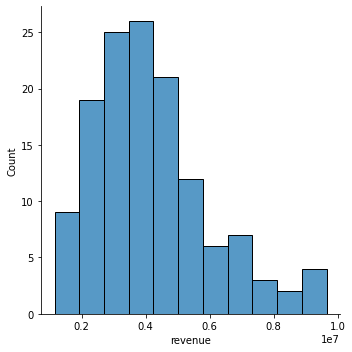

In [5]:
data_train=data_train.loc[data_train['revenue']<10000000]
sns.displot(x='revenue',
            data=data_train);
data_train

здесь распределение прибыли уже похоже на нормальное 

In [6]:
data_train.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,...,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,1.340000e+02
mean,68.104478,4.014925,4.395522,4.324627,4.373134,2.014925,3.335821,5.432836,5.186567,5.470149,...,3.182836,2.753731,1.947761,2.552239,1.149254,2.507463,2.037313,2.223881,1.119403,4.181438e+06
std,39.788212,2.940475,1.529257,1.042801,1.025404,1.220040,2.151915,2.321679,1.864459,1.846314,...,1.664017,5.585207,3.533550,5.278082,1.710241,5.209515,3.456294,4.199251,1.798265,1.799596e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.250000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.994569e+06
50%,67.500000,3.000000,4.500000,4.000000,4.000000,2.000000,2.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.887614e+06
75%,102.750000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.001114e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,9.652350e+06


In [7]:
target='revenue'
p_cols=[i for i in list(data_train.columns)][5:-1]
cat_cols=[i for i in list(data_train.columns)][3:5]

In [8]:
for i in cat_cols:
  print(str(len(data_train[i].unique())),i)
for i in cat_cols:
  print(str(len(data_test[i].unique())),i)

2 City Group
3 Type
2 City Group
4 Type


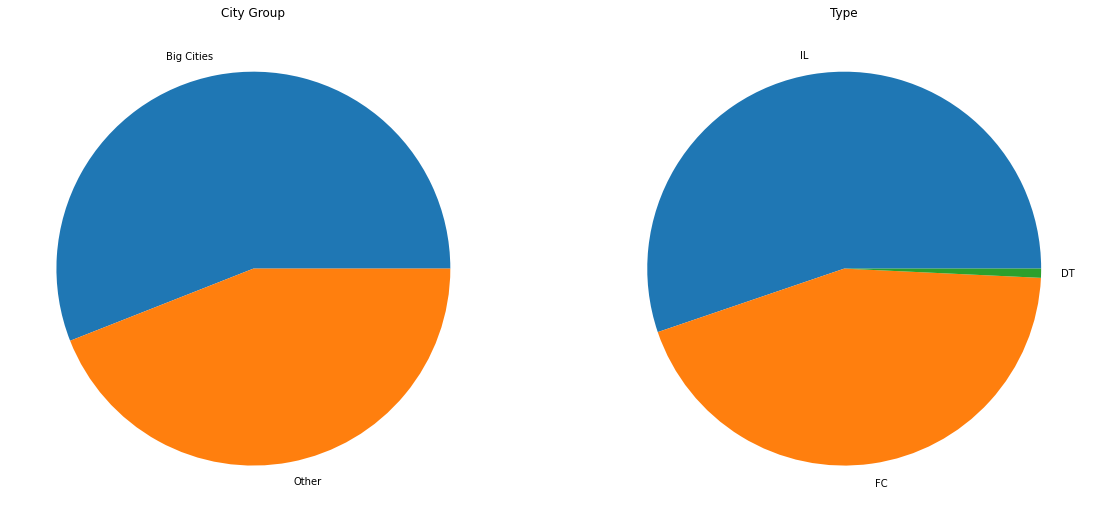

In [9]:
plt.subplots(2,2,figsize=(30,30))
for col in range(len(cat_cols)):
  b = data_train[cat_cols[col]].value_counts()
  plt.subplot(1,3, col+1)
  plt.pie(b.values,labels=data_train[cat_cols[col]].unique())
  plt.title(cat_cols[col])

видим что группы городов имеют две почти равные группы, типы распределены не равномерно

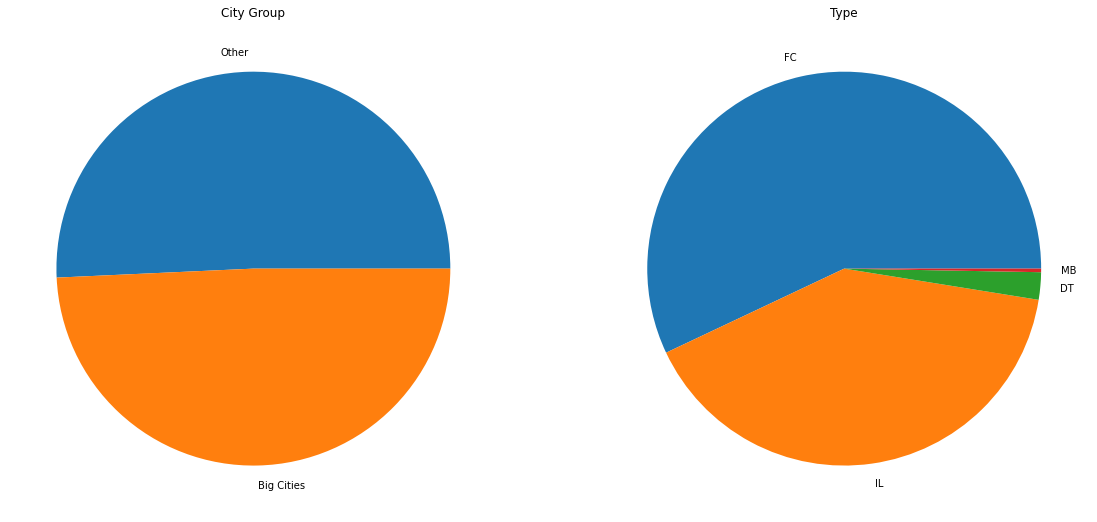

In [10]:
plt.subplots(2,2,figsize=(30,30))
for col in range(len(cat_cols)):
  b = data_test[cat_cols[col]].value_counts()
  plt.subplot(1,3, col+1)
  plt.pie(b.values,labels=data_test[cat_cols[col]].unique())
  plt.title(cat_cols[col])

На тестовой выборке вообще присутствует 4ый тип, отсутствующий на обучающей. Его можно выкинуть без потери данных

# заменем MB на DT в тестовой выборке тк доля слишком маленькая

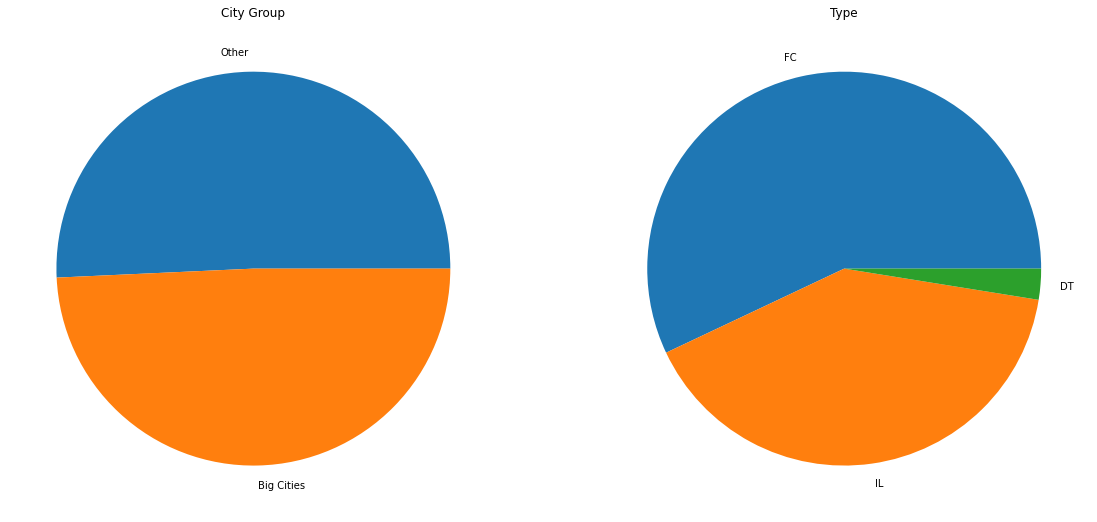

In [11]:
data_test.loc[data_test['Type']=='MB','Type']='DT'

plt.subplots(2,2,figsize=(30,30))
for col in range(len(cat_cols)):
  b = data_test[cat_cols[col]].value_counts()
  plt.subplot(1,3, col+1)
  plt.pie(b.values,labels=data_test[cat_cols[col]].unique())
  plt.title(cat_cols[col])

тип распределен не одинаково, но доля DT все же существенная

# влияние p1-p36 на revenue

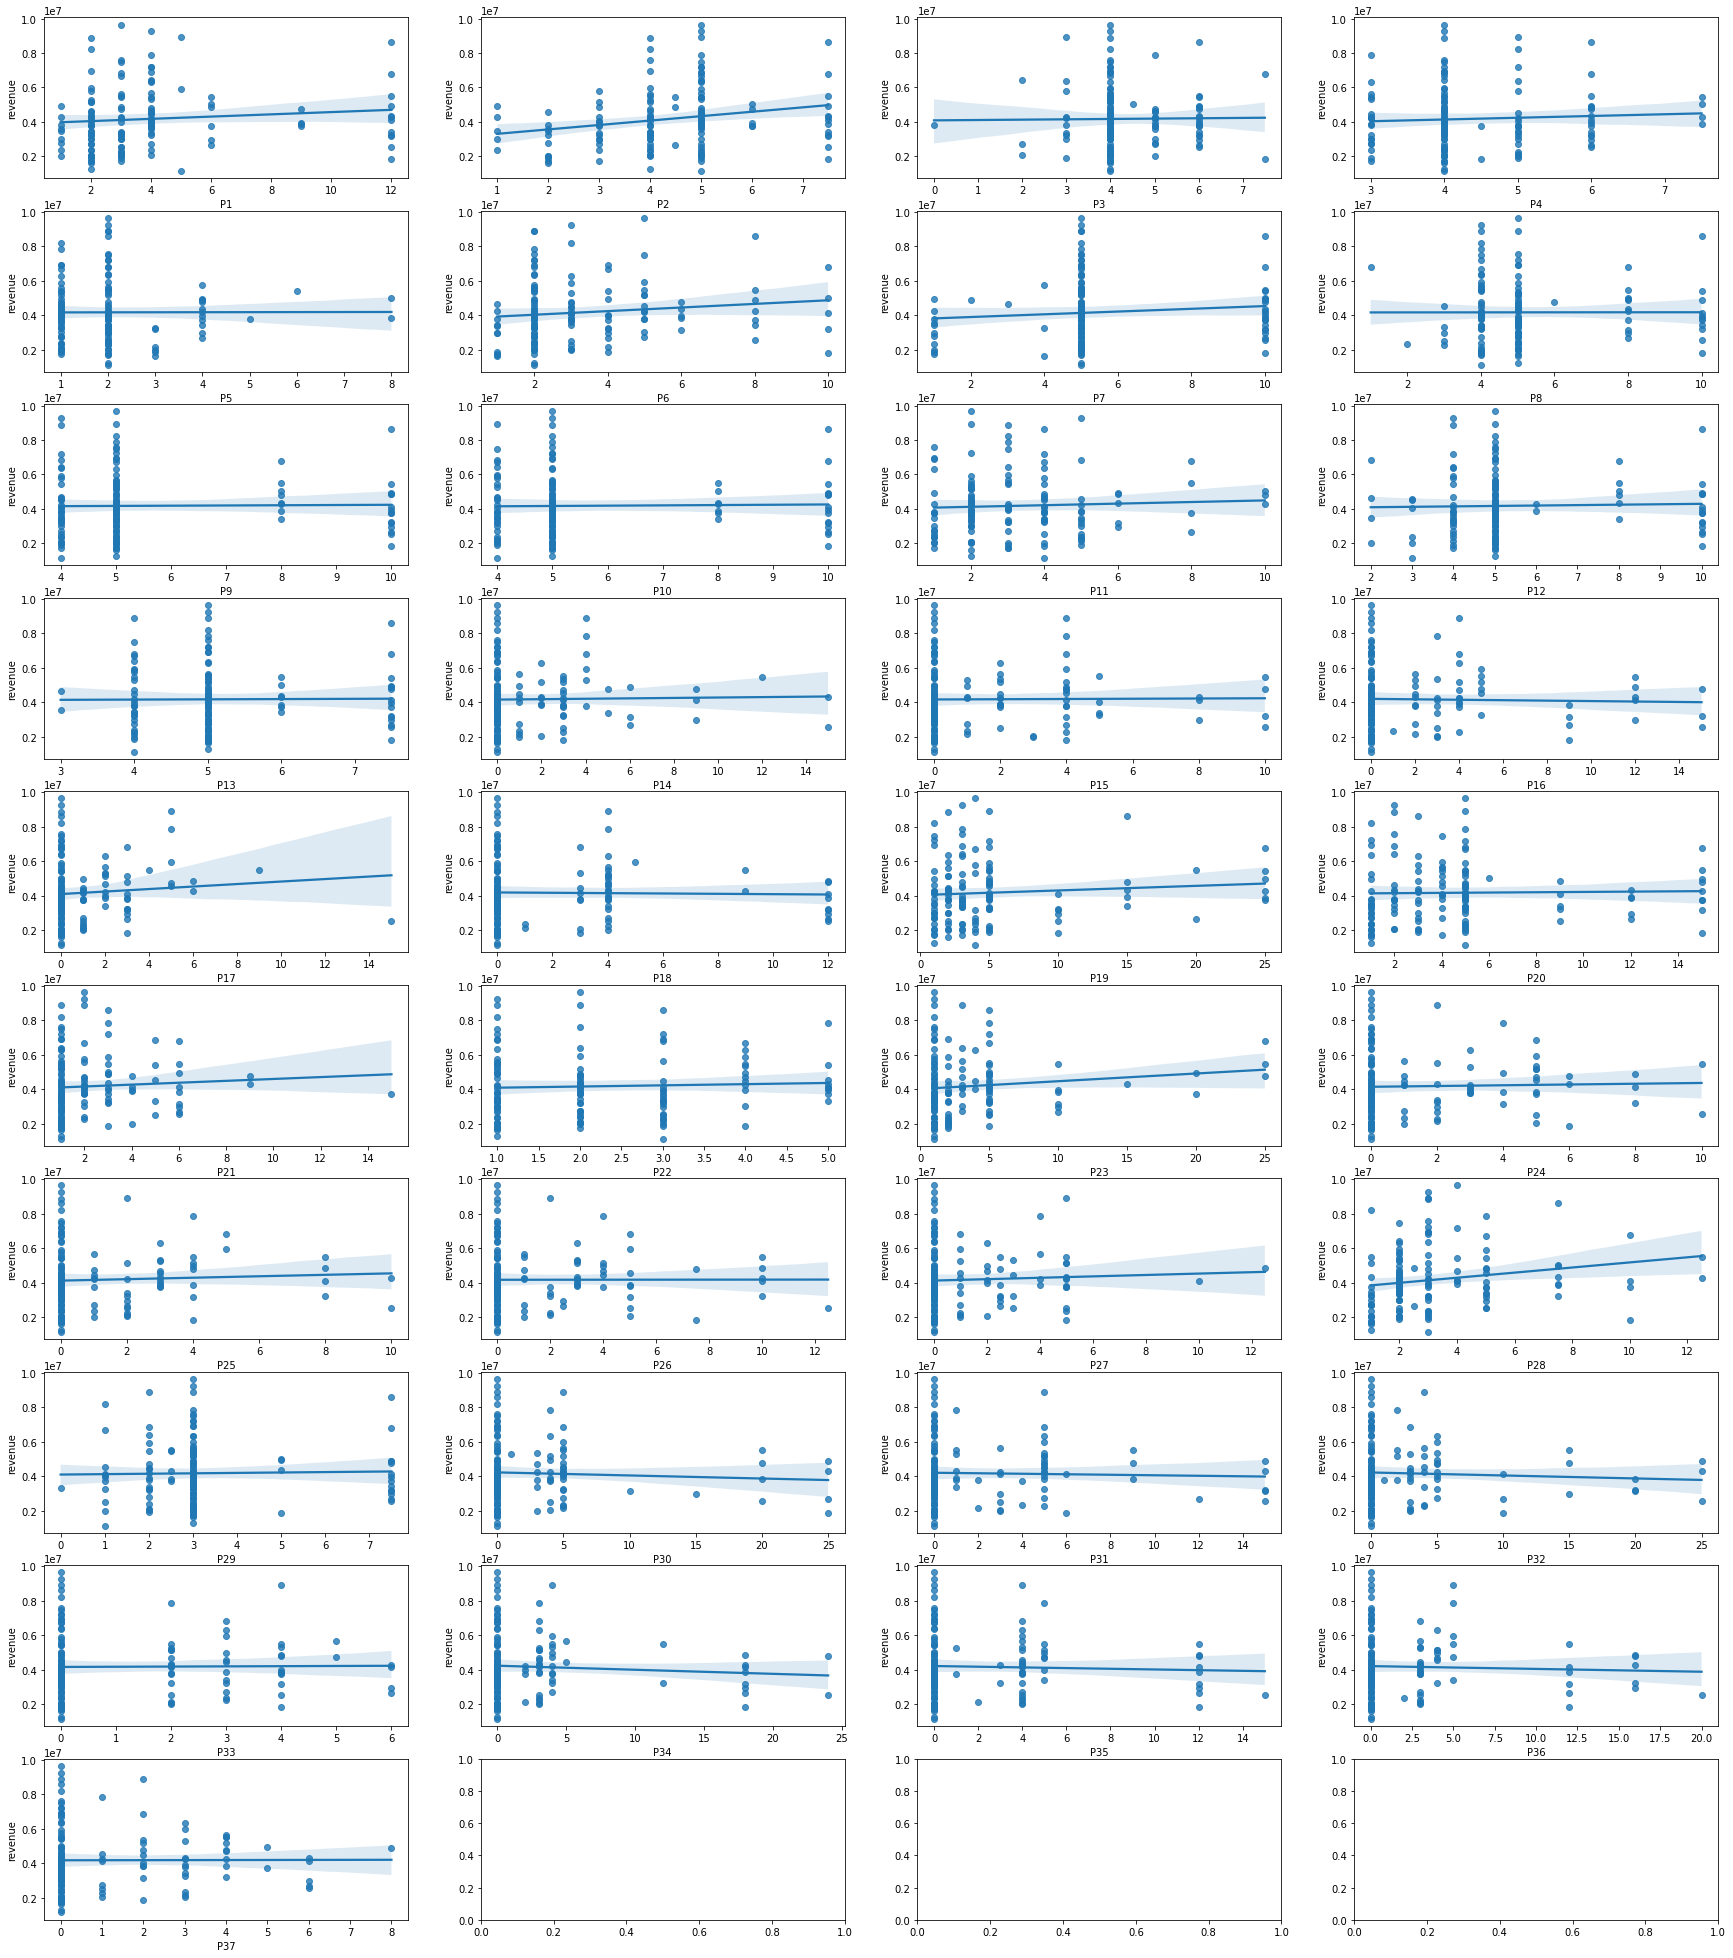

In [12]:
fig, ax = plt.subplots(10, 4, figsize=(30, 35))
for variable, subplot in zip(p_cols, ax.flatten()):
    sns.regplot(x=data_train[variable], y=data_train['revenue'], ax=subplot)

Здесь на графиках представлена зависимость P1-P37 от прибыли. На большинстве графиков прибыль не зависит от параметра, тк какое-то значение параметра встречается на всех результатах прибыли
Можно попытаться выбрать те параметры, от значения которых зависит прибыль

# выберем те которые более менее похожи на зависимости

In [13]:
p_cols_true=['P1','P2','P6','P11','P19','P20','P21','P28','P37']

разобьем дату основания ресторана на дни с открытия ресторана, год открытия и месяц открытия, думаю что день открытия не играет большой роли

In [14]:
data_train['OpenDays']=(pd.to_datetime("07/07/2022")-pd.to_datetime(data_train['Open Date'])).dt.days.astype('int16')
data_train['Year']=pd.to_datetime(data_train['Open Date']).dt.year
data_train['Month']=pd.to_datetime(data_train['Open Date']).dt.month
data_train=data_train.drop('Open Date', axis=1)
data_train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,Id,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P32,P33,P34,P35,P36,P37,revenue,OpenDays,Year,Month
0,0,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,...,4,5,5,4,3,4,5653753.0,8391,1999,7
1,1,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,...,0,0,0,0,0,0,6923131.0,5257,2008,2
2,2,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,...,0,0,0,0,0,0,2055379.0,3407,2013,3
3,3,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,...,10,6,18,12,12,6,2675511.0,3808,2012,2
4,4,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,...,3,2,3,4,3,3,4316715.0,4807,2009,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,Trabzon,Other,FC,2,3.0,3.0,5.0,4,2,...,0,0,0,0,0,0,5787594.0,5125,2008,6
133,133,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,3,...,0,0,0,0,0,0,9262754.0,5747,2006,10
134,134,Kayseri,Other,FC,3,4.0,4.0,4.0,2,3,...,0,0,0,0,0,0,2544857.0,5843,2006,7
135,135,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,2,...,0,0,0,0,0,0,7217634.0,4269,2010,10


In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error, r2_score
import xgboost
from sklearn.model_selection import GridSearchCV

# буду пробовать случайный лес, так как для задачи регрессии он хорошо подходит
# тк почти не переобучается, не требует предварительного масштабирования данных, хорошо работает с "непонятными данными"


In [16]:
from sklearn import ensemble
p_data=data_train[p_cols]
cat_data=data_train[cat_cols]
dummy_features = pd.get_dummies(cat_data)
time_data=data_train[['OpenDays','Year','Month']]
time_data.head()
X = pd.concat([dummy_features,time_data,data_train[p_cols_true]], axis=1)
y=data_train[target]
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, 
                                                    train_size=0.8,
                                                    random_state=42)


In [ ]:
param_grid = { 
    'n_estimators': [100,200,300,500],
    'max_features': ['auto', 'sqrt', 'log2']
}
clf = GridSearchCV(estimator=ensemble.RandomForestRegressor(), 
                   param_grid=param_grid,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
clf.fit(X_train, y_train)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'max_features': 'sqrt', 'n_estimators': 500}
Lowest RMSE:  1690935.9345555904


In [ ]:
rf = RandomForestRegressor(n_estimators=500, max_features='sqrt',max_depth=4).fit(X_train,y_train)
print(mean_squared_error(y_test,rf.predict(X_test))**(1/2.0))

1765781.4605296291


# для примера попробую xgboost

In [ ]:
param_grid_xgboost={'max_depth': range (2,10, 1),
    'n_estimators': range(40, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

xlf = GridSearchCV(estimator=xgboost.XGBRegressor(verbosity=0), 
                   param_grid=param_grid_xgboost,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
xlf.fit(X_train, y_train)
print("Best parameters:", xlf.best_params_)
print("Lowest RMSE: ", (-xlf.best_score_)**(1/2.0))

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best parameters: {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 80}
Lowest RMSE:  1697833.797097858


In [ ]:
xg=xgboost.XGBRegressor(n_estimators=80,max_depth=2,learning_rate=0.05).fit(X_train,y_train)
print(mean_squared_error(y_test,xg.predict(X_test))**(1/2.0))

[14:23:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1922800.3503827897


# все модели

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

ARDRegression()
1847022.6022593006
0.0524896143435154


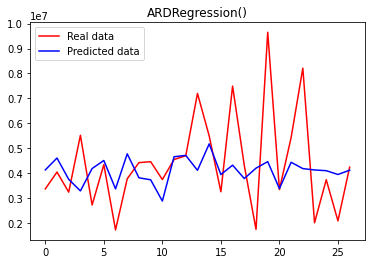

KNeighborsRegressor()
1906643.1065186143
-0.009667493237728308


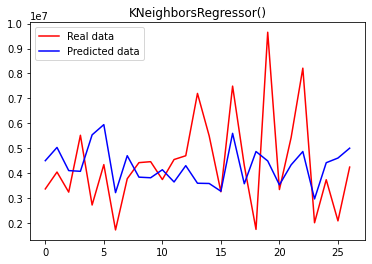

GradientBoostingRegressor()
2024917.0888474828
-0.1388172844302391


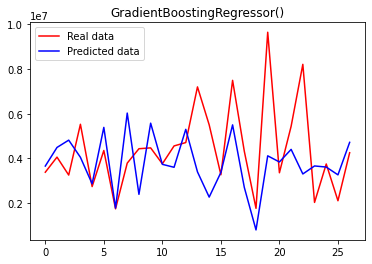

ExtraTreesRegressor()
1923959.0085417805
-0.028090127187352598


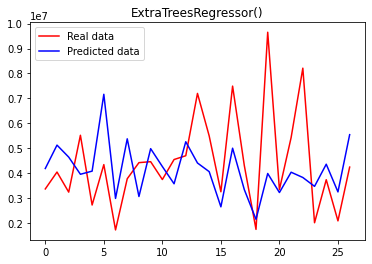

RandomForestRegressor(max_depth=4, max_features='sqrt', n_estimators=500)
1758215.2661586262
0.14141429742933065


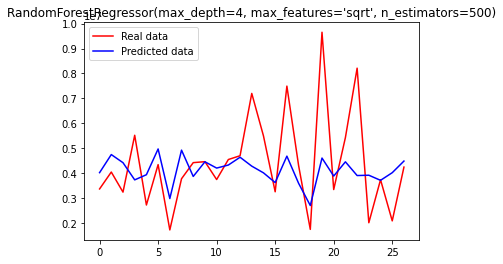

DecisionTreeRegressor()
2404152.5220090975
-0.6053273010711508


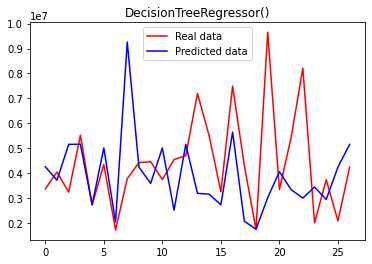

LinearRegression()
1961837.4086485656
-0.06897015942872087


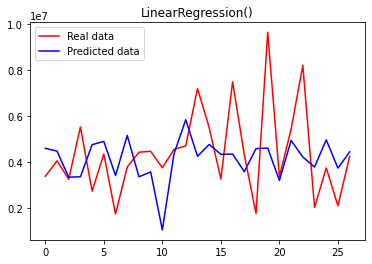

LassoCV()
1891179.7549033603
0.006643405619049969


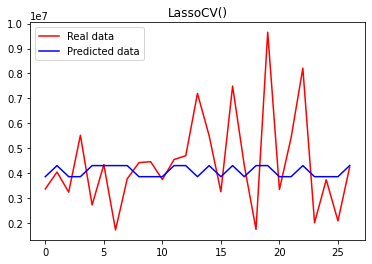

Lasso()
1918585.2179957828
-0.022355051302507922


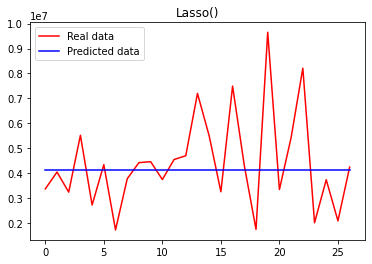

Ridge()
1846966.5788650296
0.0525470927336561


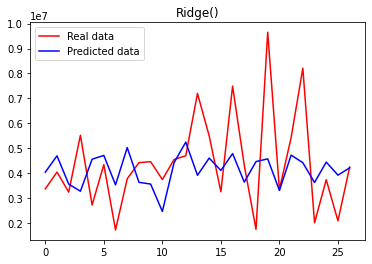

[12:20:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor(learning_rate=0.05, max_depth=2, n_estimators=80)
1845572.418649228
0.053976899457499616


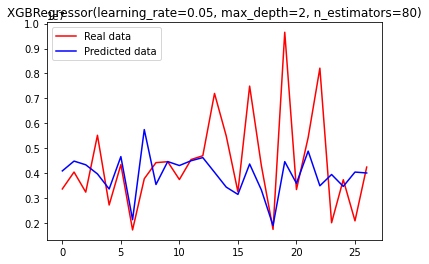

In [18]:

from sklearn.linear_model import LinearRegression, Ridge,LassoCV, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ARDRegression
regressors = [
    ARDRegression(),
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    ExtraTreesRegressor(),
     RandomForestRegressor(n_estimators=500, max_features='sqrt',max_depth=4),
    DecisionTreeRegressor(),
    LinearRegression(),
    LassoCV(),
    Lasso(),
    Ridge(),
    xgboost.XGBRegressor(n_estimators=80,max_depth=2,learning_rate=0.05)
]
mod=0
for model in regressors:
  pipeline= Pipeline(steps=[('normalize', MinMaxScaler()), ('model', model)])
  wrapped_model = TransformedTargetRegressor(regressor=pipeline, transformer=MinMaxScaler())
  wrapped_model.fit(X_train, y_train)
  yhat = wrapped_model.predict(X_test)
  mod=wrapped_model
  print(model)
  print(mean_squared_error(y_test,yhat)**(1/2.0))
  print(r2_score(y_test,yhat))
  plt.plot(y_test, color = 'red', label = 'Real data')
  plt.plot(yhat, color = 'blue', label = 'Predicted data')
  plt.title(str(model))
  plt.legend()
  plt.show()

здесь представлены графики сравнения предсказанных данных и реальных. можно заметить что реальные данные имеют разброс прибыли, и некоторые модели такие как лассо, плохо работают с этим.
Остальные модели достаточно неплохо предсказывают данные с учетом такой маленькой выборки

Можно увидеть что лучший результат получен с подобранными гиперпараметрами для случайного леса регрессии

Попробуем бэгинг над градиентным бустингом и на случайным лесом

BaggingRegressor(base_estimator=RandomForestRegressor(max_depth=4,
                                                      max_features='sqrt',
                                                      n_estimators=500),
                 random_state=0)
1719066.385512042
0.17922360962890338


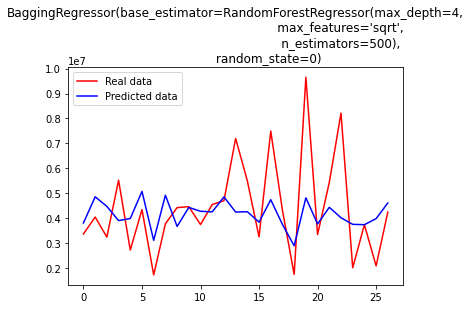

[12:20:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:20:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:20:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:20:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:20:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:20:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:20:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:20:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

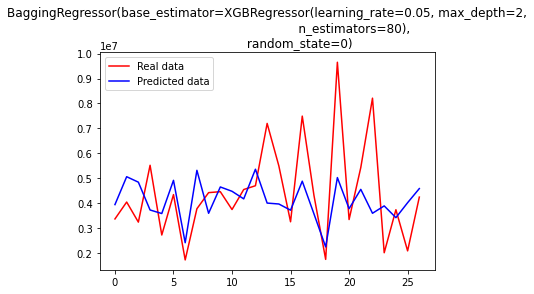

In [19]:
rf=RandomForestRegressor(n_estimators=500, max_features='sqrt',max_depth=4)
xg=xgboost.XGBRegressor(n_estimators=80,max_depth=2,learning_rate=0.05)
mod=[]
for model in [rf,xg]: 
  from sklearn.ensemble import BaggingRegressor
  model=BaggingRegressor(model,n_estimators=10,random_state=0)
  pipeline= Pipeline(steps=[('normalize', MinMaxScaler()), ('model', model)])
  wrapped_model = TransformedTargetRegressor(regressor=pipeline, transformer=MinMaxScaler())
  wrapped_model.fit(X_train, y_train)
  yhat = wrapped_model.predict(X_test)
  mod.append(wrapped_model)
  print(model)
  print(mean_squared_error(y_test,yhat)**(1/2.0))
  print(r2_score(y_test,yhat))
  plt.plot(y_test, color = 'red', label = 'Real data')
  plt.plot(yhat, color = 'blue', label = 'Predicted data')
  plt.title(str(model))
  plt.legend()
  plt.show()

# попробуем простую нейронную сеть

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [62]:
class BaggedNeuralRegressor:
  def __init__(self, B,model):
    self.B = B
    self.model=model

  def fit(self, X, Y,Epochs,Batch_size):
    N = len(X)
    self.models = []
    for b in range(self.B):
      idx = np.random.choice(N, size=N, replace=True)
      Xb = X[idx]
      Yb = Y[idx]
      model = keras.models.Sequential()
      model.add(layers.Dense(32, input_dim=17, activation='relu'))
      model.add(layers.Dense(32,activation='relu'))
      model.add(layers.Dense(32,activation='relu'))
      model.add(layers.Dense(1))
      model.compile(optimizer='adam', loss='mse', metrics=['mse'])
      model.summary()
      history=model.fit(Xb, Yb,epochs=Epochs, 
                    batch_size=Batch_size,verbose=0)
      plt.plot(history.history['mse'])
      self.models.append(model)
  def predict(self, X):
    predictions = np.zeros(len(X))
    for model in self.models:
      predictions += model.predict(X).reshape(len(X))
    return predictions / self.B

In [36]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)
model_nn = keras.models.Sequential()
model_nn.add(layers.Dense(32, input_dim=17, activation='relu'))
model_nn.add(layers.Dense(32,activation='relu'))
model_nn.add(layers.Dense(32,activation='relu'))
model_nn.add(layers.Dense(1))
model_nn.compile(optimizer='adam', loss='mse', metrics=['mse'])
model_nn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 32)                576       
                                                                 
 dense_17 (Dense)            (None, 32)                1056      
                                                                 
 dense_18 (Dense)            (None, 32)                1056      
                                                                 
 dense_19 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,721
Trainable params: 2,721
Non-trainable params: 0
_________________________________________________________________


Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_116 (Dense)           (None, 32)                576       
                                                                 
 dense_117 (Dense)           (None, 32)                1056      
                                                                 
 dense_118 (Dense)           (None, 32)                1056      
                                                                 
 dense_119 (Dense)           (None, 1)                 33        
                                                                 
Total params: 2,721
Trainable params: 2,721
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_120 (Dense)          

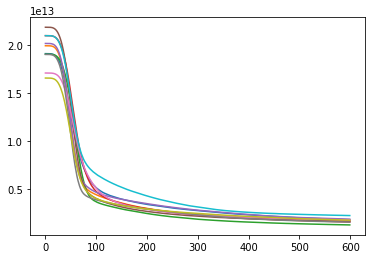

In [65]:
arr = y_train
y_ktest = StandardScaler().fit_transform(y_test[:, np.newaxis])
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)
Epochs = 600
Batch_size =5
bn=BaggedNeuralRegressor(10,model_nn)
bn.fit(X_train_sc,y_train,Epochs,Batch_size)

In [23]:

history = model_nn.fit(X_train_sc, 
                    y_train, 
                    epochs=Epochs, 
                    batch_size=Batch_size,verbose=0)


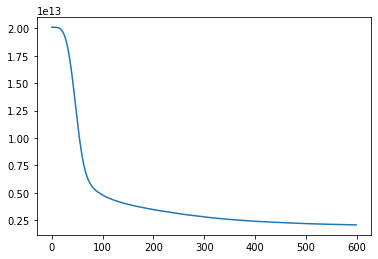

In [24]:
plt.plot(history.history['mse'])

здесь видим что лосс прекращает резко падать и поэтому для того чтобы не переобучить модель мы взяли 600 эпох

1962911.0465122038
-0.07014049176670922


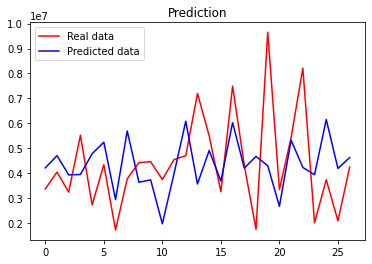

In [66]:
y_pred = bn.predict(X_test_sc)
print(mean_squared_error(y_test,y_pred)**(1/2.0))
print(r2_score(y_test,y_pred))
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

Нейронная сеть тоже нормально предсказала модель на тесте, однако всё же хуже случайного леса.
Если бы обучающая выборка состояла из большего количества элементов, думаю нейронная сеть могла бы получить результаты лучше

In [ ]:
print(mean_squared_error(y_test,model_nn.predict(X_test_sc))**(1/2.0))

1939640.204505297


In [ ]:
pip install https://github.com/JamesRitchie/scikit-rvm/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     \ 10 kB 280 kB/s
  Created wheel for scikit-rvm: filename=scikit_rvm-0.1.0a1-py3-none-any.whl size=4240 sha256=58dc8c93f0f33dd54e6010c33e4e4093eee9ba22c92340298f0f093224fdb8f5
  Stored in directory: /tmp/pip-ephem-wheel-cache-tcd0u6d0/wheels/38/4d/8c/6c26199fcff73720c62e1cae6779b5a921fb96938369026086
Successfully built scikit-rvm


1793726.80050329
0.10638149580236578


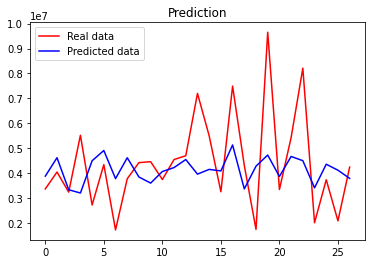

In [ ]:
from skrvm import RVR
clf = RVR(kernel='linear')
clf.fit(X_train_sc, y_train)
y_pred = clf.predict(X_test_sc)
print(mean_squared_error(y_test,y_pred)**(1/2.0))
print(r2_score(y_test,y_pred))
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [ ]:
data_test['OpenDays']=(pd.to_datetime("07/07/2022")-pd.to_datetime(data_test['Open Date'])).dt.days.astype('int16')
data_test['Year']=pd.to_datetime(data_test['Open Date']).dt.year
data_test['Month']=pd.to_datetime(data_test['Open Date']).dt.month
data_test=data_test.drop('Open Date', axis=1)


In [ ]:
data_test


,Id,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P31,P32,P33,P34,P35,P36,P37,OpenDays,Year,Month
0,0,Niğde,Other,FC,1,4.0,4.0,4.0,1,2,...,0,0,0,0,0,0,0,4184,2011,1
1,1,Konya,Other,IL,3,4.0,4.0,4.0,2,2,...,0,0,0,0,0,0,0,4129,2011,3
2,2,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,2,...,0,0,0,0,0,0,0,3172,2013,10
3,3,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,3,...,4,0,0,0,0,0,0,3349,2013,5
4,4,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,2,...,0,0,0,0,0,0,0,3263,2013,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,Antalya,Other,FC,5,5.0,4.0,4.0,2,2,...,0,0,0,0,0,0,0,8219,2000,1
99996,99996,Niğde,Other,IL,1,2.0,4.0,3.0,1,1,...,0,0,0,4,0,0,0,4007,2011,7
99997,99997,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,1,2,...,5,3,2,4,4,4,2,3477,2012,12
99998,99998,İstanbul,Big Cities,FC,12,7.5,6.0,6.0,4,4,...,0,0,4,0,0,0,0,3190,2013,10


In [ ]:
p_data_test=data_test[p_cols_true]
cat_data_test=data_test[cat_cols]
dummy_features_test = pd.get_dummies(cat_data_test)
time_data_test=data_test[['OpenDays','Year','Month']]
X_for_test = pd.concat([dummy_features_test,time_data_test,p_data_test], axis=1).values
X_for_test = scaler.transform(X_for_test)
sample_submission['Prediction'] =model_nn.predict(X_for_test)
sample_submission.to_csv('./my_submission.csv',index=False)
sample_submission

,Id,Prediction
0,0,3089630.00
1,1,2856003.00
2,2,2699336.75
3,3,2849601.00
4,4,3780604.00
...,...,...
99995,99995,6541710.50
99996,99996,3568422.25
99997,99997,4524719.00
99998,99998,5487816.50
